# Tackle analysis

In this notebook, we analyse games from Super Rugby Pacific to identify trends and prepare for the opposition.

## Data loading

In [2]:
import pandas as pd
import numpy as np

# We load the CSV file
df = pd.read_csv("./data/tackles_SuperRugbyPacific_2024-25.csv") 
df

,Game ID,Competition,Season,Date,Home team,Away team,Tackling team,Carrying team,Time,Phase,...,Tackle outcome,Tackle qualifier,Tackle dominance,Tackler number,Tackle area,Tackler name,Tackler position,Attacking player name,Missed tackle category,Missed tackle outcome
0,945268,Super Rugby Pacific,2025,15/02/2025,Western Force,Moana Pasifika,Moana Pasifika,Western Force,1_00005,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Upper Torso,Sione Havili Talitui,7,Vaiolini Ekuasi,NaN,NaN
1,945268,Super Rugby Pacific,2025,15/02/2025,Western Force,Moana Pasifika,Moana Pasifika,Western Force,1_00007,1,...,Passive,Assist,Ineffective Tackle,2nd Tackler,Upper Torso,Lalomilo Lalomilo,12,Vaiolini Ekuasi,NaN,NaN
2,945268,Super Rugby Pacific,2025,15/02/2025,Western Force,Moana Pasifika,Western Force,Moana Pasifika,1_00028,1,...,Missed,NaN,Ineffective Tackle,1st Tackler,NaN,Tom Robertson,3,Ardie Savea,Stepped,Clean Break
3,945268,Super Rugby Pacific,2025,15/02/2025,Western Force,Moana Pasifika,Western Force,Moana Pasifika,1_00029,1,...,Missed,Assist,Ineffective Tackle,2nd Tackler,NaN,Nic Dolly,2,Ardie Savea,Positional,Clean Break
4,945268,Super Rugby Pacific,2025,15/02/2025,Western Force,Moana Pasifika,Western Force,Moana Pasifika,1_00033,1,...,Complete,NaN,Neutral Tackle,1st Tackler,Upper Torso,Ben Donaldson,10,Lalomilo Lalomilo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7829,945271,Super Rugby Pacific,2025,22/02/2025,Hurricanes,Fijian Drua,Hurricanes,Fijian Drua,2_07913,17,...,Complete,NaN,Neutral Tackle,1st Tackler,Upper Torso,Pouri Rakete-Stones,1,Isoa Nasilasila,NaN,NaN
7830,945271,Super Rugby Pacific,2025,22/02/2025,Hurricanes,Fijian Drua,Hurricanes,Fijian Drua,2_07913,17,...,Complete,Assist,Neutral Tackle,2nd Tackler,Lower Torso,Hugo Plummer,5,Isoa Nasilasila,NaN,NaN
7831,945271,Super Rugby Pacific,2025,22/02/2025,Hurricanes,Fijian Drua,Hurricanes,Fijian Drua,2_07922,18,...,Complete,NaN,Neutral Tackle,1st Tackler,Lower Torso,Raymond Tuputupu,2,Inia Tabuavou,NaN,NaN
7832,945271,Super Rugby Pacific,2025,22/02/2025,Hurricanes,Fijian Drua,Hurricanes,Fijian Drua,2_07938,19,...,Missed,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Bailyn Sullivan,13,Iosefo Masi,Bumped Off,Tackled


## Overall stats

In [4]:
# Count occurrences of each 'Tackle outcome' overall
outcome_counts_overall = df['Tackle outcome'].value_counts()

# Calculate percentages
outcome_percentages_overall = (outcome_counts_overall / outcome_counts_overall.sum()) * 100

# Print results
print("Overall Tackle Outcome Distribution:")
for outcome in outcome_counts_overall.index:
    print(f"{outcome}\t{outcome_counts_overall[outcome]}\t{outcome_percentages_overall[outcome]:.1f}%")


Overall Tackle Outcome Distribution:
Complete	3642	46.5%
Passive	2078	26.5%
Missed	936	11.9%
Offload Allowed	503	6.4%
Sack	320	4.1%
Ineffective	146	1.9%
Turnover Won	90	1.1%
Pen Conceded	67	0.9%
Forced in Touch	27	0.3%
Try Saver	25	0.3%


## Team summaries

### When the team is tackling

In [6]:
# Count occurrences of each outcome per team
outcome_counts = df.groupby(['Tackling team', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in outcome_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': outcome_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in team_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Complete	358	51.6%
Passive	158	22.8%
Missed	89	12.8%
Offload Allowed	49	7.1%
Sack	16	2.3%
Turnover Won	10	1.4%
Pen Conceded	6	0.9%
Ineffective	5	0.7%
Try Saver	2	0.3%
Forced in Touch	1	0.1%
------------------------------
Team: Blues
Complete	504	52.2%
Passive	254	26.3%
Missed	101	10.5%
Sack	43	4.5%
Offload Allowed	36	3.7%
Turnover Won	11	1.1%
Pen Conceded	7	0.7%
Ineffective	4	0.4%
Forced in Touch	3	0.3%
Try Saver	2	0.2%
------------------------------
Team: Chiefs
Complete	354	48.0%
Passive	192	26.0%
Missed	83	11.2%
Sack	42	5.7%
Offload Allowed	38	5.1%
Turnover Won	8	1.1%
Ineffective	7	0.9%
Pen Conceded	7	0.9%
Forced in Touch	4	0.5%
Try Saver	3	0.4%
------------------------------
Team: Crusaders
Complete	306	47.2%
Passive	140	21.6%
Missed	82	12.7%
Offload Allowed	63	9.7%
Sack	27	4.2%
Ineffective	13	2.0%
Pen Conceded	7	1.1%
Turnover Won	5	0.8%
Forced in Touch	4	0.6%
Try Saver	1	0.2%
------------------------------
Team: Fijian Drua
Complete	237	38.0%
Passive	188	30.2%
M

### When the team is carrying (i.e., being tackled)

In [8]:
# Count occurrences of each outcome per team
outcome_counts = df.groupby(['Carrying team', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in outcome_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': outcome_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in team_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Complete	457	52.8%
Passive	226	26.1%
Missed	79	9.1%
Offload Allowed	38	4.4%
Sack	27	3.1%
Ineffective	14	1.6%
Turnover Won	11	1.3%
Try Saver	7	0.8%
Pen Conceded	4	0.5%
Forced in Touch	2	0.2%
------------------------------
Team: Blues
Complete	320	45.9%
Passive	195	28.0%
Missed	77	11.0%
Offload Allowed	41	5.9%
Sack	37	5.3%
Ineffective	12	1.7%
Pen Conceded	7	1.0%
Turnover Won	7	1.0%
Forced in Touch	1	0.1%
Try Saver	0	0.0%
------------------------------
Team: Chiefs
Complete	378	44.4%
Passive	219	25.7%
Missed	120	14.1%
Offload Allowed	52	6.1%
Sack	35	4.1%
Ineffective	20	2.4%
Turnover Won	11	1.3%
Pen Conceded	10	1.2%
Try Saver	5	0.6%
Forced in Touch	1	0.1%
------------------------------
Team: Crusaders
Complete	355	51.0%
Passive	138	19.8%
Missed	89	12.8%
Offload Allowed	55	7.9%
Sack	29	4.2%
Ineffective	12	1.7%
Try Saver	6	0.9%
Turnover Won	6	0.9%
Pen Conceded	4	0.6%
Forced in Touch	2	0.3%
------------------------------
Team: Fijian Drua
Complete	276	42.8%
Passive	200	31.0

## Team-specific defence analysis

### Players missing tackles

In [10]:
selected_team = 'Highlanders'

# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Count occurrences of each outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'Missed' tackles (descending), defaulting to 0% if 'Missed' is not present
sorted_players = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player
print(f"Team: {selected_team}")
for player in sorted_players:
    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': outcome_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in player_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Highlanders
Player: Michael Manson
Missed	5	38.5%
Passive	4	30.8%
Offload Allowed	2	15.4%
Ineffective	1	7.7%
Sack	1	7.7%
Complete	0	0.0%
Forced in Touch	0	0.0%
Pen Conceded	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Taine Robinson
Passive	7	43.8%
Missed	4	25.0%
Complete	2	12.5%
Sack	2	12.5%
Offload Allowed	1	6.2%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Pen Conceded	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Cameron Millar
Passive	3	75.0%
Missed	1	25.0%
Complete	0	0.0%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Offload Allowed	0	0.0%
Pen Conceded	0	0.0%
Sack	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Lui Naeata
Complete	8	40.0%
Missed	5	25.0%
Passive	3	15.0%
Sack	2	10.0%
Offload Allowed	1	5.0%
Pen Conceded	1	5.0%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Tanielu Tele'a
Complete	7	26.9%
Passive	6	23.1%
Missed	5	19.2%
Sack	4	15.4%
Ineffective	2	7.7%
Offloa

### Players with dominant tackles

In [12]:
# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Count occurrences of each outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'Missed' tackles (descending), defaulting to 0% if 'Missed' is not present
sorted_players = outcome_percentages.get('Sack', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player
print(f"Team: {selected_team}")
for player in sorted_players:
    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': outcome_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in player_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Highlanders
Player: Jake Te Hiwi
Complete	1	50.0%
Sack	1	50.0%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Missed	0	0.0%
Offload Allowed	0	0.0%
Passive	0	0.0%
Pen Conceded	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Henry Bell
Complete	6	50.0%
Ineffective	2	16.7%
Passive	2	16.7%
Sack	2	16.7%
Forced in Touch	0	0.0%
Missed	0	0.0%
Offload Allowed	0	0.0%
Pen Conceded	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Caleb Tangitau
Complete	3	23.1%
Passive	3	23.1%
Sack	2	15.4%
Ineffective	1	7.7%
Missed	1	7.7%
Offload Allowed	1	7.7%
Pen Conceded	1	7.7%
Turnover Won	1	7.7%
Forced in Touch	0	0.0%
------------------------------
Player: Tanielu Tele'a
Complete	7	26.9%
Passive	6	23.1%
Missed	5	19.2%
Sack	4	15.4%
Ineffective	2	7.7%
Offload Allowed	2	7.7%
Forced in Touch	0	0.0%
Pen Conceded	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Taine Robinson
Passive	7	43.8%
Missed	4	25.0%
Complete	2	12.5%
Sack	2	12.5%
Offload Allowed	1	6.2%
Forc

### Type of missed tackles

In [14]:
# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Filter for missed tackles
df_missed = df_team.dropna(subset=['Missed tackle category'], inplace=False)

In [15]:
# Count occurrences of each tackle outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Extract only missed tackles for analysis
df_missed = df_team[df_team['Tackle outcome'] == 'Missed']

# Count occurrences of each missed tackle category per player
missed_category_counts = df_missed.groupby(['Tackler name', 'Missed tackle category']).size().unstack(fill_value=0)

# Calculate percentages for missed tackle categories
missed_category_percentages = missed_category_counts.div(missed_category_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of missed tackles (descending), defaulting to 0% if no missed tackles
sorted_players = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player in sorted order
print(f"Team: {selected_team}")
for player in sorted_players:
    total_missed = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).loc[player]  # Total missed tackles
    missed_percentage = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).loc[player]  # Percentage of missed tackles

    if total_missed > 0:
        print(f"Player: {player} - Missed tackles: {total_missed} ({missed_percentage:.1f}%)")
        player_missed_data = pd.DataFrame({
            'Count': missed_category_counts.loc[player].astype(int),
            'Percentage': missed_category_percentages.loc[player]
        }).sort_values(by='Count', ascending=False)

        for category, row in player_missed_data.iterrows():
            print(f"{category}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

        print("-" * 30)


Team: Highlanders
Player: Michael Manson - Missed tackles: 5 (38.5%)
Stepped	3	60.0%
Bumped Off	2	40.0%
Outpaced	0	0.0%
Positional	0	0.0%
------------------------------
Player: Taine Robinson - Missed tackles: 4 (25.0%)
Bumped Off	2	50.0%
Positional	1	25.0%
Stepped	1	25.0%
Outpaced	0	0.0%
------------------------------
Player: Cameron Millar - Missed tackles: 1 (25.0%)
Bumped Off	1	100.0%
Outpaced	0	0.0%
Positional	0	0.0%
Stepped	0	0.0%
------------------------------
Player: Lui Naeata - Missed tackles: 5 (25.0%)
Bumped Off	3	60.0%
Positional	2	40.0%
Outpaced	0	0.0%
Stepped	0	0.0%
------------------------------
Player: Tanielu Tele'a - Missed tackles: 5 (19.2%)
Stepped	3	60.0%
Bumped Off	1	20.0%
Positional	1	20.0%
Outpaced	0	0.0%
------------------------------
Player: Sam Gilbert - Missed tackles: 3 (18.8%)
Bumped Off	2	66.7%
Stepped	1	33.3%
Outpaced	0	0.0%
Positional	0	0.0%
------------------------------
Player: Ethan de Groot - Missed tackles: 5 (18.5%)
Bumped Off	3	60.0%
Outpaced	1	

## Team-specific attack analysis

### Players evading tackles

In [17]:
selected_team = 'Highlanders'

# Filter for the selected team
df_team = df[df['Carrying team'] == selected_team]

# Filter for missed tackles
df_missed = df_team.dropna(subset=['Missed tackle category'], inplace=False)

In [18]:
# Count occurrences of each tackle outcome per player
outcome_counts = df_team.groupby(['Attacking player name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Extract only missed tackles for analysis
df_missed = df_team[df_team['Tackle outcome'] == 'Missed']

# Count occurrences of each missed tackle category per player
missed_category_counts = df_missed.groupby(['Attacking player name', 'Missed tackle category']).size().unstack(fill_value=0)

# Calculate percentages for missed tackle categories
missed_category_percentages = missed_category_counts.div(missed_category_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of missed tackles (descending), defaulting to 0% if no missed tackles
sorted_players = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).sort_values(ascending=False).index

# Show results player by player in sorted order
print(f"Team: {selected_team}")
for player in sorted_players:
    total_missed = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).loc[player]  # Total missed tackles
    missed_percentage = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).loc[player]  # Percentage of missed tackles

    if total_missed > 0:
        print(f"Player: {player} - Evaded tackles: {total_missed} ({missed_percentage:.1f}%)")
        player_missed_data = pd.DataFrame({
            'Count': missed_category_counts.loc[player].astype(int),
            'Percentage': missed_category_percentages.loc[player]
        }).sort_values(by='Count', ascending=False)

        for category, row in player_missed_data.iterrows():
            print(f"{category}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

        print("-" * 30)


Team: Highlanders
Player: Timoci Tavatavanawai - Evaded tackles: 13 (17.8%)
Bumped Off	7	53.8%
Outpaced	5	38.5%
Stepped	1	7.7%
Positional	0	0.0%
------------------------------
Player: Caleb Tangitau - Evaded tackles: 10 (31.2%)
Bumped Off	5	50.0%
Positional	2	20.0%
Stepped	2	20.0%
Outpaced	1	10.0%
------------------------------
Player: Michael Manson - Evaded tackles: 7 (33.3%)
Bumped Off	3	42.9%
Positional	2	28.6%
Stepped	2	28.6%
Outpaced	0	0.0%
------------------------------
Player: Nathan Hastie - Evaded tackles: 6 (22.2%)
Stepped	4	66.7%
Bumped Off	1	16.7%
Outpaced	1	16.7%
Positional	0	0.0%
------------------------------
Player: Finn Hurley - Evaded tackles: 4 (33.3%)
Outpaced	3	75.0%
Stepped	1	25.0%
Bumped Off	0	0.0%
Positional	0	0.0%
------------------------------
Player: Tanielu Tele'a - Evaded tackles: 4 (8.7%)
Bumped Off	3	75.0%
Outpaced	1	25.0%
Positional	0	0.0%
Stepped	0	0.0%
------------------------------
Player: Sam Gilbert - Evaded tackles: 4 (16.0%)
Bumped Off	2	50.0%
Ou

### Players offloading the ball

In [20]:
# Count occurrences of "Offload Allowed" per player
offload_counts = df_team[df_team['Tackle outcome'] == 'Offload Allowed'].groupby('Attacking player name').size()

# Calculate total tackles per player to compute percentages
total_tackles_per_player = df_team.groupby('Attacking player name').size()

# Compute percentage of "Offload Allowed" tackles for each player
offload_percentage = (offload_counts / total_tackles_per_player * 100).fillna(0)

# Create a sorted list of players based on "Offload Allowed" count (descending)
sorted_offload_players = offload_counts.sort_values(ascending=False).index

# Print the results
print(f"Players sorted by 'Offload Allowed' (Team: {selected_team})")
for player in sorted_offload_players:
    print(f"{player}\t{offload_counts[player]}\t{offload_percentage[player]:.1f}%")


Players sorted by 'Offload Allowed' (Team: Highlanders)
Nathan Hastie	9	33.3%
Timoci Tavatavanawai	7	9.6%
Finn Hurley	4	33.3%
Michael Manson	4	19.0%
Caleb Tangitau	3	9.4%
Sean Withy	3	17.6%
Taine Robinson	3	20.0%
James Arscott	2	100.0%
Tanielu Tele'a	2	4.3%
Veveni Lasaqa	2	13.3%
Folau Fakatava	1	14.3%
Sam Gilbert	1	4.0%


## Visualisation

In [22]:
viz_team = "Highlanders"
viz_season = 2025

df_viz = df[(df['Season'] == viz_season) & (df['Tackling team'] == viz_team)]
df_viz

,Game ID,Competition,Season,Date,Home team,Away team,Tackling team,Carrying team,Time,Phase,...,Tackle outcome,Tackle qualifier,Tackle dominance,Tackler number,Tackle area,Tackler name,Tackler position,Attacking player name,Missed tackle category,Missed tackle outcome
1602,945265,Super Rugby Pacific,2025,14/02/2025,NSW Waratahs,Highlanders,Highlanders,NSW Waratahs,1_00006,1,...,Complete,NaN,Neutral Tackle,1st Tackler,Upper Torso,Soane Vikena,2,Langi Gleeson,NaN,NaN
1603,945265,Super Rugby Pacific,2025,14/02/2025,NSW Waratahs,Highlanders,Highlanders,NSW Waratahs,1_00006,1,...,Complete,Assist,Neutral Tackle,2nd Tackler,Legs,Saula Ma'u,3,Langi Gleeson,NaN,NaN
1615,945265,Super Rugby Pacific,2025,14/02/2025,NSW Waratahs,Highlanders,Highlanders,NSW Waratahs,1_00059,1,...,Offload Allowed,NaN,Ineffective Tackle,1st Tackler,Legs,Timoci Tavatavanawai,12,Max Jorgensen,NaN,NaN
1616,945265,Super Rugby Pacific,2025,14/02/2025,NSW Waratahs,Highlanders,Highlanders,NSW Waratahs,1_00146,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Upper Torso,Lui Naeata,6,Joseph-Aukuso Suaalii,NaN,NaN
1618,945265,Super Rugby Pacific,2025,14/02/2025,NSW Waratahs,Highlanders,Highlanders,NSW Waratahs,1_00205,1,...,Missed,NaN,Ineffective Tackle,1st Tackler,NaN,Tanielu Tele'a,13,Andrew Kellaway,Stepped,Tackled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,945272,Super Rugby Pacific,2025,22/02/2025,Highlanders,Blues,Highlanders,Blues,2_07217,2,...,Complete,NaN,Neutral Tackle,1st Tackler,Lower Torso,Sean Withy,6,Corey Evans,NaN,NaN
7058,945272,Super Rugby Pacific,2025,22/02/2025,Highlanders,Blues,Highlanders,Blues,2_07217,2,...,Passive,Assist,Ineffective Tackle,2nd Tackler,Legs,Will Stodart,6,Corey Evans,NaN,NaN
7059,945272,Super Rugby Pacific,2025,22/02/2025,Highlanders,Blues,Highlanders,Blues,2_07223,3,...,Passive,NaN,Ineffective Tackle,1st Tackler,Legs,Nathan Hastie,9,Josh Beehre,NaN,NaN
7071,945272,Super Rugby Pacific,2025,22/02/2025,Highlanders,Blues,Highlanders,Blues,2_07543,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Soane Vikena,2,Beauden Barrett,NaN,NaN


In [23]:
class field():
    def __init__(self):
        #import the libraries and then create self variables so that all necessary imports are initialized only once
        from matplotlib.patches import Rectangle as rect
        self.plt = plt
        self.rect = rect
        
    
    def union_pitch(self, pitch_color = 'white', line_color = 'Black', poles = False, linestyle = '-', line_alpha=1):
        
        #draw the rectangle that makes up the pitch and lies behind the field lines
        ax.add_patch(self.rect((0, 0), 100, 68, fc = pitch_color, zorder=0))

        #top & bottom lines
        plt.hlines(0, 0, 100, line_color), plt.hlines(68, 0, 100, line_color)

        #ends, half, 22s
        for x in range(5):
            c = [0, 22, 50, 78, 100]
            plt.vlines(c[x], 0, 68, line_color)

        #vertical and horizontal coordinates
        vertical_lines = [(2, 8), (12, 18), (66, 60), (56, 50), (22, 29), (39, 46)]
        horizontal_lines = [(47, 53), (37, 43), (57, 63), (19, 25), (75, 81), (5, 11), (95, 89)]
        vertical_y, horizontal_y = [5, 40, 60, 95], [5, 15, 53, 63]

        #lines
        for x in range(6):
            for y in range(4):
                plt.vlines(vertical_y[y], vertical_lines[x][0], vertical_lines[x][1], line_color, linestyle, line_alpha, zorder=0)
        for x in range(7):
            for y in range(4):
                plt.hlines(horizontal_y[y], horizontal_lines[x][0], horizontal_lines[x][1], line_color, linestyle, line_alpha, zorder=0)
        
        #if poles is true draw two thick rectangles at either end of the field
        if poles is True:
                plt.vlines(0, 29, 39, line_color, '-', alpha=1, linewidth=5, zorder=0)
                plt.vlines(100, 29, 39, line_color, '-', alpha=1, linewidth=5, zorder=0)

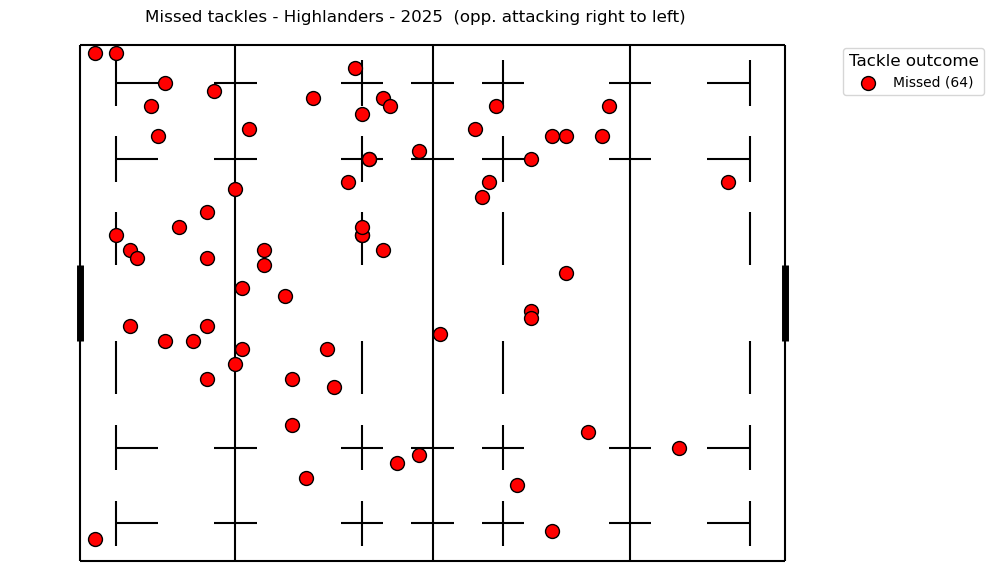

In [24]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define colors and markers for different kick types
styles = {
    'Missed':      {'color': 'red',  'marker': 'o'},
    # 'Kick Line Break': {'color': 'blue',  'marker': 's'}
}

type_counts = df_viz['Tackle outcome'].value_counts()

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome'] != 'Missed':
        continue
    style = styles.get(row['Tackle outcome'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackle outcome'] not in scatter_handles:
        scatter_handles[row['Tackle outcome']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[key] for key in styles.keys() if key in scatter_handles]
legend_labels = [f'{key} ({type_counts[key]})' for key in styles.keys() if key in scatter_handles]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tackle outcome', fontsize=10, title_fontsize=12)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map.png", bbox_inches='tight')
plt.show()

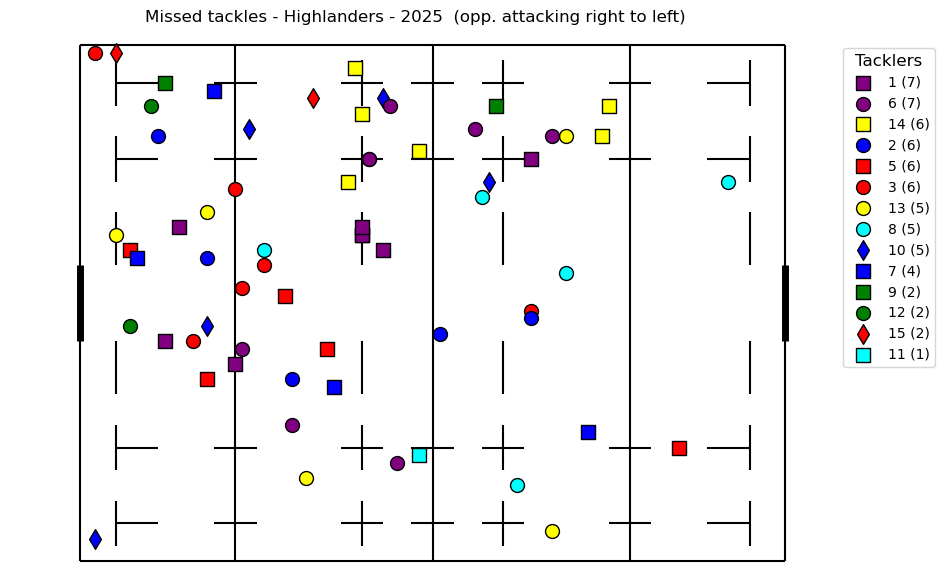

In [25]:
import itertools

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define a list of colors and markers for combinations
colors = ['blue', 'red', 'green', 'purple', 'yellow', 'cyan']
markers = ['o', 's', 'd', '^', 'v', '<', '>']

# Generate all combinations of colors and markers
color_marker_combinations = list(itertools.product(markers, colors))

# Generate a unique color-marker combination for each 'Kicking player'
players = df_viz['Tackler position'].unique()
styles = {
    player: {'color': color_marker_combinations[i % len(color_marker_combinations)][1], 
             'marker': color_marker_combinations[i % len(color_marker_combinations)][0]}
    for i, player in enumerate(players)
}

# Count the frequency of each tackler
player_counts = df_viz[df_viz['Tackle outcome']=='Missed']['Tackler position'].value_counts()

# Sort players by frequency (descending)
sorted_players = player_counts.index

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome']!='Missed':
        continue
    style = styles.get(row['Tackler position'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackler position'] not in scatter_handles:
        scatter_handles[row['Tackler position']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[player] for player in sorted_players if player in scatter_handles]
legend_labels = [f'{player} ({player_counts[player]})' for player in sorted_players if player in scatter_handles]

# Plot the legend
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tacklers', fontsize=10, title_fontsize=12)


# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map (by positions).png", bbox_inches='tight')
plt.show()

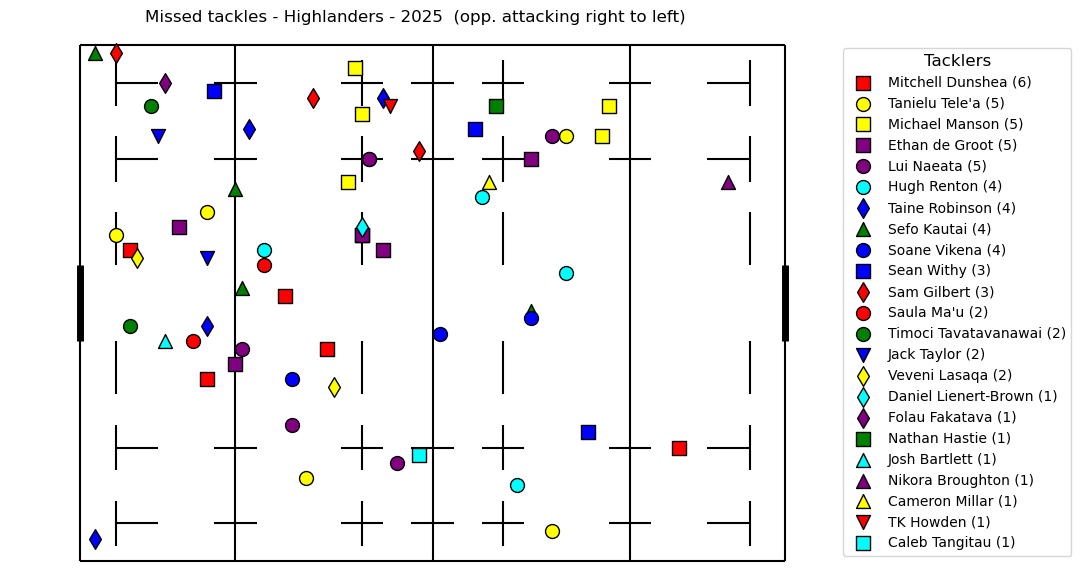

In [26]:
import itertools

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define a list of colors and markers for combinations
colors = ['blue', 'red', 'green', 'purple', 'yellow', 'cyan']
markers = ['o', 's', 'd', '^', 'v', '<', '>']

# Generate all combinations of colors and markers
color_marker_combinations = list(itertools.product(markers, colors))

# Generate a unique color-marker combination for each 'Kicking player'
players = df_viz['Tackler name'].unique()
styles = {
    player: {'color': color_marker_combinations[i % len(color_marker_combinations)][1], 
             'marker': color_marker_combinations[i % len(color_marker_combinations)][0]}
    for i, player in enumerate(players)
}

# Count the frequency of each tackler
player_counts = df_viz[df_viz['Tackle outcome']=='Missed']['Tackler name'].value_counts()

# Sort players by frequency (descending)
sorted_players = player_counts.index

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome']!='Missed':
        continue
    style = styles.get(row['Tackler name'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackler name'] not in scatter_handles:
        scatter_handles[row['Tackler name']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[player] for player in sorted_players if player in scatter_handles]
legend_labels = [f'{player} ({player_counts[player]})' for player in sorted_players if player in scatter_handles]

# Plot the legend
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tacklers', fontsize=10, title_fontsize=12)


# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map (by players).png", bbox_inches='tight')
plt.show()

Done.